In [1]:
#Save con Nodos
import os
from keras.models import load_model
import itertools
from matplotlib import pyplot as plt
from keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import os, sys
dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)
from sklearn.utils import class_weight
import numpy as np

from evaluation import calculate_metrics
from sklearn.metrics import confusion_matrix,accuracy_score
import pandas as pd
from keras.regularizers import l2
from keras.activations import tanh
from keras.models import Sequential
from keras.layers import *
from keras.losses import categorical_crossentropy,binary_crossentropy
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras import optimizers
from keras import backend as K
from time import time
import random
from random import shuffle,seed
from sklearn.metrics import classification_report
import math
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping
from keras.backend import eval



Using TensorFlow backend.
E0709 16:09:30.696095 140586498090816 ultratb.py:149] Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/users/gmolina/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-bbb94f6348ad>", line 3, in <module>
    from keras.models import load_model
  File "/users/gmolina/anaconda2/envs/py36/lib/python3.6/site-packages/keras/__init__.py", line 3, in <module>
    from . import utils
  File "/users/gmolina/anaconda2/envs/py36/lib/python3.6/site-packages/keras/utils/__init__.py", line 6, in <module>
    from . import conv_utils
  File "/users/gmolina/anaconda2/envs/py36/lib/python3.6/site-packages/keras/utils/conv_utils.py", line 9, in <module>
    from .. import backend as K
  File "/users/gmolina/anaconda2/envs/py36/lib/python3.6/site-packages/keras/backend/__init__.py", line 89, in <module>
    from .tensorflow_backend import *
  File "/users/gmolina/anaconda2/envs/py36/lib/python3.6/site-packages/keras/backend/tensor

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
from sklearn.preprocessing import normalize
import time

def plot_confusion_matrix(cm, target_names, title='Confusion matrix (f1-score)',cmap=None, normalize=True):
    
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [3]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), strides=(1,1)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (5, 5), strides=(1, 1), activation="relu", padding="same"))
model.add(Conv2D(256, (5, 5), strides=(1, 1), activation="relu", padding="same"))
#model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 15, 15, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       819456    
_________________________________________________________________
global_average_poolin

In [4]:






model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 15, 15, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
global_average_pooling2d_2 ( (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
__________

In [5]:
fold = "../../KOI_Data/"
df_sets = pd.read_csv(fold+"/koi_sets_unb.csv") 
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
mask_unlabeled = (df_sets["Set"] == "Unlabeled").values
df_sets.head()

KOI Name        Set
0  K00889.01       Test
1  K01009.01      Train
2  K07621.01      Train
3  K06252.01      Train
4  K00958.01  Unlabeled

In [6]:
df_meta = pd.read_csv(fold+"/koi_metadata.csv")
df_meta_train = df_meta[mask_train]
df_meta_test = df_meta[mask_test]
df_meta_unb = df_meta[mask_unlabeled]

df_meta_train.head()

KOI Name NExScI Disposition Kepler Name      Period  \
1  K01009.01     FALSE POSITIVE         NaN    5.092465   
2  K07621.01     FALSE POSITIVE         NaN  275.073650   
3  K06252.01     FALSE POSITIVE         NaN    8.460439   
6  K04162.01     FALSE POSITIVE         NaN    0.539366   
9  K00998.01     FALSE POSITIVE         NaN  161.788327   

   Time of Transit Epoch  First Transit Time (BJD)  Impact Parameter  \
1              357.53594               2455190.536             0.161   
2              315.24860               2455148.249             0.595   
3              133.77449               2454966.774             1.061   
6              131.97457               2454964.975             0.988   
9              214.03900               2455047.039             0.267   

   Duration  Transit Depth    r/R       ...          Teff  log(g)  \
1   3.65900          254.0  0.014       ...        5037.0   4.547   
2   3.37000          228.9  0.014       ...        5604.0   4.226   
3   4.73492        76412.9  0.478       ...        5951.0   4.638   
6   5.43400          145.0  0.016       ...        6341.0   3.301   
9   5.31000        87750.0  0.273       ...        6018.0   4.327   

   Metallicity  Stellar Radius  Stellar Mass  Max single event sigma  \
1        -0.20           0.751         0.727                   3.648   
2        -0.12           1.187         0.864                   5.909   
3        -1.06           0.702         0.796                 452.526   
6        -0.10           5.302         2.050                   4.847   
9         0.18           1.212         1.142                 341.666   

   Max Multievent sigma  Transit Model SNR  KOI count  Transit Number  
1                15.175               17.1          1             225  
2                 8.012                7.5          1               4  
3              3704.503             1797.4          1             164  
6                 9.076               57.6          1            1239  
9               806.993              704.5          1               9  

[5 rows x 31 columns]

In [7]:
kois_train=df_meta_train['KOI Name'].values
labels_train=df_meta_train['NExScI Disposition'].values
kois_val=df_meta_test['KOI Name'].values
labels_val=df_meta_test['NExScI Disposition'].values
kois_test=df_meta_unb['KOI Name'].values
labels_test=df_meta_unb['NExScI Disposition'].values

In [8]:
labels_train[:5]

array(['FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

In [9]:
def to_int(labels):
    y_true=[]
    for y in labels:
        if y=='CONFIRMED':
            y_true.append(1)
        else:
            y_true.append(0)
    return y_true

In [10]:
y_train=to_int(labels_train)
y_val=to_int(labels_val)

In [11]:
y_train[:6]

[0, 0, 0, 0, 0, 1]

In [12]:
folder_fp='/work/work_teamEXOPLANET/MTF/falsos_positivos/'
folder_c='/work/work_teamEXOPLANET/MTF_gabo/'
falsos=os.listdir(folder_fp)
confirmed=os.listdir(folder_c+'confirmados')
candidates=os.listdir(folder_c+'candidatos')
#load data
x_train=[]
i=0
for koi in kois_train:
    print ("Cargando objeto", koi, 'con ientificador',i)
    if labels_train[i]=='FALSE POSITIVE':
        x_train.append(np.load(folder_fp+koi+'.npy'))
    else:
        x_train.append(np.load(folder_c+'confirmados/'+koi+'.npy'))
    i+=1
 

('Cargando objeto', 'K01009.01', 'con ientificador', 0)
('Cargando objeto', 'K07621.01', 'con ientificador', 1)
('Cargando objeto', 'K06252.01', 'con ientificador', 2)
('Cargando objeto', 'K04162.01', 'con ientificador', 3)
('Cargando objeto', 'K00998.01', 'con ientificador', 4)
('Cargando objeto', 'K00992.01', 'con ientificador', 5)
('Cargando objeto', 'K00982.01', 'con ientificador', 6)
('Cargando objeto', 'K03924.01', 'con ientificador', 7)
('Cargando objeto', 'K07623.01', 'con ientificador', 8)
('Cargando objeto', 'K00362.01', 'con ientificador', 9)
('Cargando objeto', 'K03658.01', 'con ientificador', 10)
('Cargando objeto', 'K00993.01', 'con ientificador', 11)
('Cargando objeto', 'K00993.02', 'con ientificador', 12)
('Cargando objeto', 'K00993.03', 'con ientificador', 13)
('Cargando objeto', 'K01008.01', 'con ientificador', 14)
('Cargando objeto', 'K04224.01', 'con ientificador', 15)
('Cargando objeto', 'K04212.01', 'con ientificador', 16)
('Cargando objeto', 'K01007.01', 'con ien

('Cargando objeto', 'K02277.01', 'con ientificador', 149)
('Cargando objeto', 'K03993.01', 'con ientificador', 150)
('Cargando objeto', 'K06300.01', 'con ientificador', 151)
('Cargando objeto', 'K01788.01', 'con ientificador', 152)
('Cargando objeto', 'K01788.02', 'con ientificador', 153)
('Cargando objeto', 'K02032.01', 'con ientificador', 154)
('Cargando objeto', 'K00197.01', 'con ientificador', 155)
('Cargando objeto', 'K04959.01', 'con ientificador', 156)
('Cargando objeto', 'K01824.01', 'con ientificador', 157)
('Cargando objeto', 'K01824.02', 'con ientificador', 158)
('Cargando objeto', 'K02692.01', 'con ientificador', 159)
('Cargando objeto', 'K02335.01', 'con ientificador', 160)
('Cargando objeto', 'K03379.01', 'con ientificador', 161)
('Cargando objeto', 'K06098.01', 'con ientificador', 162)
('Cargando objeto', 'K06302.01', 'con ientificador', 163)
('Cargando objeto', 'K02540.01', 'con ientificador', 164)
('Cargando objeto', 'K07642.01', 'con ientificador', 165)
('Cargando obj

('Cargando objeto', 'K01204.01', 'con ientificador', 298)
('Cargando objeto', 'K04980.01', 'con ientificador', 299)
('Cargando objeto', 'K03509.01', 'con ientificador', 300)
('Cargando objeto', 'K06334.01', 'con ientificador', 301)
('Cargando objeto', 'K06335.01', 'con ientificador', 302)
('Cargando objeto', 'K00976.01', 'con ientificador', 303)
('Cargando objeto', 'K03593.01', 'con ientificador', 304)
('Cargando objeto', 'K01218.01', 'con ientificador', 305)
('Cargando objeto', 'K08087.01', 'con ientificador', 306)
('Cargando objeto', 'K01185.01', 'con ientificador', 307)
('Cargando objeto', 'K04042.01', 'con ientificador', 308)
('Cargando objeto', 'K04802.01', 'con ientificador', 309)
('Cargando objeto', 'K01735.01', 'con ientificador', 310)
('Cargando objeto', 'K00385.01', 'con ientificador', 311)
('Cargando objeto', 'K01198.01', 'con ientificador', 312)
('Cargando objeto', 'K01198.02', 'con ientificador', 313)
('Cargando objeto', 'K01198.03', 'con ientificador', 314)
('Cargando obj

('Cargando objeto', 'K05990.01', 'con ientificador', 446)
('Cargando objeto', 'K07674.01', 'con ientificador', 447)
('Cargando objeto', 'K00995.01', 'con ientificador', 448)
('Cargando objeto', 'K02887.01', 'con ientificador', 449)
('Cargando objeto', 'K01188.01', 'con ientificador', 450)
('Cargando objeto', 'K03938.01', 'con ientificador', 451)
('Cargando objeto', 'K04423.01', 'con ientificador', 452)
('Cargando objeto', 'K05023.01', 'con ientificador', 453)
('Cargando objeto', 'K02289.01', 'con ientificador', 454)
('Cargando objeto', 'K02289.02', 'con ientificador', 455)
('Cargando objeto', 'K01205.01', 'con ientificador', 456)
('Cargando objeto', 'K05991.01', 'con ientificador', 457)
('Cargando objeto', 'K00809.01', 'con ientificador', 458)
('Cargando objeto', 'K00221.01', 'con ientificador', 459)
('Cargando objeto', 'K06373.01', 'con ientificador', 460)
('Cargando objeto', 'K01215.01', 'con ientificador', 461)
('Cargando objeto', 'K00392.01', 'con ientificador', 462)
('Cargando obj

('Cargando objeto', 'K06404.01', 'con ientificador', 596)
('Cargando objeto', 'K07691.01', 'con ientificador', 597)
('Cargando objeto', 'K03669.01', 'con ientificador', 598)
('Cargando objeto', 'K02787.01', 'con ientificador', 599)
('Cargando objeto', 'K05058.01', 'con ientificador', 600)
('Cargando objeto', 'K05059.01', 'con ientificador', 601)
('Cargando objeto', 'K06407.01', 'con ientificador', 602)
('Cargando objeto', 'K02876.01', 'con ientificador', 603)
('Cargando objeto', 'K02876.02', 'con ientificador', 604)
('Cargando objeto', 'K08093.01', 'con ientificador', 605)
('Cargando objeto', 'K06408.01', 'con ientificador', 606)
('Cargando objeto', 'K03698.01', 'con ientificador', 607)
('Cargando objeto', 'K01327.01', 'con ientificador', 608)
('Cargando objeto', 'K06410.01', 'con ientificador', 609)
('Cargando objeto', 'K07692.01', 'con ientificador', 610)
('Cargando objeto', 'K02987.01', 'con ientificador', 611)
('Cargando objeto', 'K04712.01', 'con ientificador', 612)
('Cargando obj

('Cargando objeto', 'K04013.01', 'con ientificador', 743)
('Cargando objeto', 'K00605.01', 'con ientificador', 744)
('Cargando objeto', 'K00232.05', 'con ientificador', 745)
('Cargando objeto', 'K06456.01', 'con ientificador', 746)
('Cargando objeto', 'K06457.01', 'con ientificador', 747)
('Cargando objeto', 'K05093.01', 'con ientificador', 748)
('Cargando objeto', 'K00633.01', 'con ientificador', 749)
('Cargando objeto', 'K04683.01', 'con ientificador', 750)
('Cargando objeto', 'K00499.01', 'con ientificador', 751)
('Cargando objeto', 'K03067.01', 'con ientificador', 752)
('Cargando objeto', 'K08251.01', 'con ientificador', 753)
('Cargando objeto', 'K06459.01', 'con ientificador', 754)
('Cargando objeto', 'K03505.01', 'con ientificador', 755)
('Cargando objeto', 'K03560.01', 'con ientificador', 756)
('Cargando objeto', 'K02991.01', 'con ientificador', 757)
('Cargando objeto', 'K04092.01', 'con ientificador', 758)
('Cargando objeto', 'K06460.01', 'con ientificador', 759)
('Cargando obj

('Cargando objeto', 'K08098.01', 'con ientificador', 894)
('Cargando objeto', 'K00140.01', 'con ientificador', 895)
('Cargando objeto', 'K05128.01', 'con ientificador', 896)
('Cargando objeto', 'K03583.01', 'con ientificador', 897)
('Cargando objeto', 'K03325.01', 'con ientificador', 898)
('Cargando objeto', 'K00824.01', 'con ientificador', 899)
('Cargando objeto', 'K06531.01', 'con ientificador', 900)
('Cargando objeto', 'K06533.01', 'con ientificador', 901)
('Cargando objeto', 'K06534.01', 'con ientificador', 902)
('Cargando objeto', 'K05131.01', 'con ientificador', 903)
('Cargando objeto', 'K06535.01', 'con ientificador', 904)
('Cargando objeto', 'K02563.01', 'con ientificador', 905)
('Cargando objeto', 'K04246.01', 'con ientificador', 906)
('Cargando objeto', 'K06536.01', 'con ientificador', 907)
('Cargando objeto', 'K03638.01', 'con ientificador', 908)
('Cargando objeto', 'K01669.01', 'con ientificador', 909)
('Cargando objeto', 'K07720.01', 'con ientificador', 910)
('Cargando obj

('Cargando objeto', 'K03965.01', 'con ientificador', 1042)
('Cargando objeto', 'K03967.01', 'con ientificador', 1043)
('Cargando objeto', 'K04135.01', 'con ientificador', 1044)
('Cargando objeto', 'K01762.01', 'con ientificador', 1045)
('Cargando objeto', 'K08254.01', 'con ientificador', 1046)
('Cargando objeto', 'K03342.01', 'con ientificador', 1047)
('Cargando objeto', 'K06576.01', 'con ientificador', 1048)
('Cargando objeto', 'K01935.01', 'con ientificador', 1049)
('Cargando objeto', 'K06577.01', 'con ientificador', 1050)
('Cargando objeto', 'K03213.01', 'con ientificador', 1051)
('Cargando objeto', 'K04671.01', 'con ientificador', 1052)
('Cargando objeto', 'K02794.01', 'con ientificador', 1053)
('Cargando objeto', 'K03696.01', 'con ientificador', 1054)
('Cargando objeto', 'K00834.01', 'con ientificador', 1055)
('Cargando objeto', 'K00834.03', 'con ientificador', 1056)
('Cargando objeto', 'K00834.04', 'con ientificador', 1057)
('Cargando objeto', 'K00834.05', 'con ientificador', 105

('Cargando objeto', 'K00840.01', 'con ientificador', 1193)
('Cargando objeto', 'K00164.01', 'con ientificador', 1194)
('Cargando objeto', 'K03703.01', 'con ientificador', 1195)
('Cargando objeto', 'K02790.01', 'con ientificador', 1196)
('Cargando objeto', 'K00371.01', 'con ientificador', 1197)
('Cargando objeto', 'K06612.01', 'con ientificador', 1198)
('Cargando objeto', 'K06612.02', 'con ientificador', 1199)
('Cargando objeto', 'K05189.01', 'con ientificador', 1200)
('Cargando objeto', 'K05190.01', 'con ientificador', 1201)
('Cargando objeto', 'K07734.01', 'con ientificador', 1202)
('Cargando objeto', 'K03711.01', 'con ientificador', 1203)
('Cargando objeto', 'K06613.01', 'con ientificador', 1204)
('Cargando objeto', 'K02856.01', 'con ientificador', 1205)
('Cargando objeto', 'K00505.02', 'con ientificador', 1206)
('Cargando objeto', 'K00505.05', 'con ientificador', 1207)
('Cargando objeto', 'K00283.02', 'con ientificador', 1208)
('Cargando objeto', 'K02983.01', 'con ientificador', 120

('Cargando objeto', 'K07754.01', 'con ientificador', 1344)
('Cargando objeto', 'K06639.01', 'con ientificador', 1345)
('Cargando objeto', 'K06640.01', 'con ientificador', 1346)
('Cargando objeto', 'K01035.01', 'con ientificador', 1347)
('Cargando objeto', 'K05215.01', 'con ientificador', 1348)
('Cargando objeto', 'K03319.02', 'con ientificador', 1349)
('Cargando objeto', 'K00655.02', 'con ientificador', 1350)
('Cargando objeto', 'K00303.01', 'con ientificador', 1351)
('Cargando objeto', 'K00656.01', 'con ientificador', 1352)
('Cargando objeto', 'K00191.01', 'con ientificador', 1353)
('Cargando objeto', 'K06642.01', 'con ientificador', 1354)
('Cargando objeto', 'K04817.01', 'con ientificador', 1355)
('Cargando objeto', 'K05218.01', 'con ientificador', 1356)
('Cargando objeto', 'K05219.01', 'con ientificador', 1357)
('Cargando objeto', 'K01036.01', 'con ientificador', 1358)
('Cargando objeto', 'K01041.01', 'con ientificador', 1359)
('Cargando objeto', 'K06644.01', 'con ientificador', 136

('Cargando objeto', 'K01129.01', 'con ientificador', 1494)
('Cargando objeto', 'K00849.01', 'con ientificador', 1495)
('Cargando objeto', 'K04095.01', 'con ientificador', 1496)
('Cargando objeto', 'K05255.01', 'con ientificador', 1497)
('Cargando objeto', 'K03158.01', 'con ientificador', 1498)
('Cargando objeto', 'K03158.02', 'con ientificador', 1499)
('Cargando objeto', 'K03158.03', 'con ientificador', 1500)
('Cargando objeto', 'K03158.04', 'con ientificador', 1501)
('Cargando objeto', 'K03158.05', 'con ientificador', 1502)
('Cargando objeto', 'K01812.01', 'con ientificador', 1503)
('Cargando objeto', 'K06682.01', 'con ientificador', 1504)
('Cargando objeto', 'K06683.01', 'con ientificador', 1505)
('Cargando objeto', 'K06685.01', 'con ientificador', 1506)
('Cargando objeto', 'K03803.01', 'con ientificador', 1507)
('Cargando objeto', 'K03501.01', 'con ientificador', 1508)
('Cargando objeto', 'K08120.01', 'con ientificador', 1509)
('Cargando objeto', 'K02221.01', 'con ientificador', 151

('Cargando objeto', 'K07783.01', 'con ientificador', 1647)
('Cargando objeto', 'K00270.02', 'con ientificador', 1648)
('Cargando objeto', 'K07784.01', 'con ientificador', 1649)
('Cargando objeto', 'K06726.01', 'con ientificador', 1650)
('Cargando objeto', 'K01237.01', 'con ientificador', 1651)
('Cargando objeto', 'K03646.02', 'con ientificador', 1652)
('Cargando objeto', 'K00157.02', 'con ientificador', 1653)
('Cargando objeto', 'K00157.03', 'con ientificador', 1654)
('Cargando objeto', 'K00157.04', 'con ientificador', 1655)
('Cargando objeto', 'K00157.05', 'con ientificador', 1656)
('Cargando objeto', 'K00157.06', 'con ientificador', 1657)
('Cargando objeto', 'K05298.01', 'con ientificador', 1658)
('Cargando objeto', 'K06728.01', 'con ientificador', 1659)
('Cargando objeto', 'K03769.01', 'con ientificador', 1660)
('Cargando objeto', 'K01627.01', 'con ientificador', 1661)
('Cargando objeto', 'K06729.01', 'con ientificador', 1662)
('Cargando objeto', 'K02777.01', 'con ientificador', 166

('Cargando objeto', 'K06778.01', 'con ientificador', 1806)
('Cargando objeto', 'K04023.01', 'con ientificador', 1807)
('Cargando objeto', 'K00866.01', 'con ientificador', 1808)
('Cargando objeto', 'K03757.01', 'con ientificador', 1809)
('Cargando objeto', 'K07794.01', 'con ientificador', 1810)
('Cargando objeto', 'K06779.01', 'con ientificador', 1811)
('Cargando objeto', 'K00867.01', 'con ientificador', 1812)
('Cargando objeto', 'K06780.01', 'con ientificador', 1813)
('Cargando objeto', 'K06782.01', 'con ientificador', 1814)
('Cargando objeto', 'K02434.01', 'con ientificador', 1815)
('Cargando objeto', 'K05330.01', 'con ientificador', 1816)
('Cargando objeto', 'K02375.01', 'con ientificador', 1817)
('Cargando objeto', 'K01348.01', 'con ientificador', 1818)
('Cargando objeto', 'K02439.01', 'con ientificador', 1819)
('Cargando objeto', 'K01732.01', 'con ientificador', 1820)
('Cargando objeto', 'K02220.03', 'con ientificador', 1821)
('Cargando objeto', 'K06784.01', 'con ientificador', 182

('Cargando objeto', 'K00672.01', 'con ientificador', 1961)
('Cargando objeto', 'K00672.02', 'con ientificador', 1962)
('Cargando objeto', 'K00672.03', 'con ientificador', 1963)
('Cargando objeto', 'K04258.01', 'con ientificador', 1964)
('Cargando objeto', 'K06826.01', 'con ientificador', 1965)
('Cargando objeto', 'K06827.01', 'con ientificador', 1966)
('Cargando objeto', 'K06828.01', 'con ientificador', 1967)
('Cargando objeto', 'K07579.01', 'con ientificador', 1968)
('Cargando objeto', 'K03514.01', 'con ientificador', 1969)
('Cargando objeto', 'K08135.01', 'con ientificador', 1970)
('Cargando objeto', 'K07814.01', 'con ientificador', 1971)
('Cargando objeto', 'K07815.01', 'con ientificador', 1972)
('Cargando objeto', 'K07816.01', 'con ientificador', 1973)
('Cargando objeto', 'K04874.01', 'con ientificador', 1974)
('Cargando objeto', 'K07817.01', 'con ientificador', 1975)
('Cargando objeto', 'K00873.01', 'con ientificador', 1976)
('Cargando objeto', 'K06831.01', 'con ientificador', 197

('Cargando objeto', 'K01501.01', 'con ientificador', 2113)
('Cargando objeto', 'K00457.01', 'con ientificador', 2114)
('Cargando objeto', 'K00457.02', 'con ientificador', 2115)
('Cargando objeto', 'K00567.01', 'con ientificador', 2116)
('Cargando objeto', 'K00567.02', 'con ientificador', 2117)
('Cargando objeto', 'K00567.03', 'con ientificador', 2118)
('Cargando objeto', 'K00676.01', 'con ientificador', 2119)
('Cargando objeto', 'K01890.01', 'con ientificador', 2120)
('Cargando objeto', 'K02063.01', 'con ientificador', 2121)
('Cargando objeto', 'K01452.01', 'con ientificador', 2122)
('Cargando objeto', 'K08268.01', 'con ientificador', 2123)
('Cargando objeto', 'K00886.02', 'con ientificador', 2124)
('Cargando objeto', 'K00886.03', 'con ientificador', 2125)
('Cargando objeto', 'K06879.01', 'con ientificador', 2126)
('Cargando objeto', 'K03096.01', 'con ientificador', 2127)
('Cargando objeto', 'K01517.01', 'con ientificador', 2128)
('Cargando objeto', 'K06880.01', 'con ientificador', 212

('Cargando objeto', 'K00515.01', 'con ientificador', 2266)
('Cargando objeto', 'K02881.01', 'con ientificador', 2267)
('Cargando objeto', 'K03787.01', 'con ientificador', 2268)
('Cargando objeto', 'K01710.01', 'con ientificador', 2269)
('Cargando objeto', 'K02861.01', 'con ientificador', 2270)
('Cargando objeto', 'K04227.01', 'con ientificador', 2271)
('Cargando objeto', 'K06920.01', 'con ientificador', 2272)
('Cargando objeto', 'K02938.01', 'con ientificador', 2273)
('Cargando objeto', 'K00896.01', 'con ientificador', 2274)
('Cargando objeto', 'K04268.01', 'con ientificador', 2275)
('Cargando objeto', 'K06044.01', 'con ientificador', 2276)
('Cargando objeto', 'K01454.01', 'con ientificador', 2277)
('Cargando objeto', 'K00171.01', 'con ientificador', 2278)
('Cargando objeto', 'K03804.01', 'con ientificador', 2279)
('Cargando objeto', 'K01456.01', 'con ientificador', 2280)
('Cargando objeto', 'K00048.01', 'con ientificador', 2281)
('Cargando objeto', 'K05436.01', 'con ientificador', 228

('Cargando objeto', 'K03269.01', 'con ientificador', 2424)
('Cargando objeto', 'K05475.01', 'con ientificador', 2425)
('Cargando objeto', 'K00235.01', 'con ientificador', 2426)
('Cargando objeto', 'K00162.01', 'con ientificador', 2427)
('Cargando objeto', 'K05478.01', 'con ientificador', 2428)
('Cargando objeto', 'K08273.01', 'con ientificador', 2429)
('Cargando objeto', 'K01550.01', 'con ientificador', 2430)
('Cargando objeto', 'K06968.01', 'con ientificador', 2431)
('Cargando objeto', 'K02030.01', 'con ientificador', 2432)
('Cargando objeto', 'K07867.01', 'con ientificador', 2433)
('Cargando objeto', 'K01542.01', 'con ientificador', 2434)
('Cargando objeto', 'K00571.01', 'con ientificador', 2435)
('Cargando objeto', 'K00571.02', 'con ientificador', 2436)
('Cargando objeto', 'K00571.03', 'con ientificador', 2437)
('Cargando objeto', 'K00571.04', 'con ientificador', 2438)
('Cargando objeto', 'K00571.05', 'con ientificador', 2439)
('Cargando objeto', 'K06050.01', 'con ientificador', 244

('Cargando objeto', 'K03761.01', 'con ientificador', 2578)
('Cargando objeto', 'K07016.01', 'con ientificador', 2579)
('Cargando objeto', 'K07017.01', 'con ientificador', 2580)
('Cargando objeto', 'K07018.01', 'con ientificador', 2581)
('Cargando objeto', 'K07019.01', 'con ientificador', 2582)
('Cargando objeto', 'K04846.01', 'con ientificador', 2583)
('Cargando objeto', 'K03767.01', 'con ientificador', 2584)
('Cargando objeto', 'K01132.01', 'con ientificador', 2585)
('Cargando objeto', 'K07020.01', 'con ientificador', 2586)
('Cargando objeto', 'K01137.01', 'con ientificador', 2587)
('Cargando objeto', 'K00573.01', 'con ientificador', 2588)
('Cargando objeto', 'K02385.01', 'con ientificador', 2589)
('Cargando objeto', 'K07021.01', 'con ientificador', 2590)
('Cargando objeto', 'K01141.01', 'con ientificador', 2591)
('Cargando objeto', 'K00122.01', 'con ientificador', 2592)
('Cargando objeto', 'K01146.01', 'con ientificador', 2593)
('Cargando objeto', 'K00420.01', 'con ientificador', 259

('Cargando objeto', 'K01270.01', 'con ientificador', 2730)
('Cargando objeto', 'K01270.02', 'con ientificador', 2731)
('Cargando objeto', 'K02022.01', 'con ientificador', 2732)
('Cargando objeto', 'K02022.02', 'con ientificador', 2733)
('Cargando objeto', 'K00578.01', 'con ientificador', 2734)
('Cargando objeto', 'K07898.01', 'con ientificador', 2735)
('Cargando objeto', 'K07062.01', 'con ientificador', 2736)
('Cargando objeto', 'K04263.01', 'con ientificador', 2737)
('Cargando objeto', 'K02459.01', 'con ientificador', 2738)
('Cargando objeto', 'K04610.01', 'con ientificador', 2739)
('Cargando objeto', 'K04337.01', 'con ientificador', 2740)
('Cargando objeto', 'K07063.01', 'con ientificador', 2741)
('Cargando objeto', 'K06058.01', 'con ientificador', 2742)
('Cargando objeto', 'K07064.01', 'con ientificador', 2743)
('Cargando objeto', 'K02330.01', 'con ientificador', 2744)
('Cargando objeto', 'K01275.01', 'con ientificador', 2745)
('Cargando objeto', 'K07899.01', 'con ientificador', 274

('Cargando objeto', 'K08170.01', 'con ientificador', 2883)
('Cargando objeto', 'K08171.01', 'con ientificador', 2884)
('Cargando objeto', 'K08172.01', 'con ientificador', 2885)
('Cargando objeto', 'K00581.01', 'con ientificador', 2886)
('Cargando objeto', 'K01282.01', 'con ientificador', 2887)
('Cargando objeto', 'K06188.01', 'con ientificador', 2888)
('Cargando objeto', 'K07095.01', 'con ientificador', 2889)
('Cargando objeto', 'K07096.01', 'con ientificador', 2890)
('Cargando objeto', 'K03968.01', 'con ientificador', 2891)
('Cargando objeto', 'K00081.01', 'con ientificador', 2892)
('Cargando objeto', 'K03266.01', 'con ientificador', 2893)
('Cargando objeto', 'K01850.01', 'con ientificador', 2894)
('Cargando objeto', 'K00922.01', 'con ientificador', 2895)
('Cargando objeto', 'K01821.01', 'con ientificador', 2896)
('Cargando objeto', 'K08173.01', 'con ientificador', 2897)
('Cargando objeto', 'K02508.01', 'con ientificador', 2898)
('Cargando objeto', 'K07097.01', 'con ientificador', 289

('Cargando objeto', 'K04125.01', 'con ientificador', 3038)
('Cargando objeto', 'K07134.01', 'con ientificador', 3039)
('Cargando objeto', 'K07926.01', 'con ientificador', 3040)
('Cargando objeto', 'K05614.01', 'con ientificador', 3041)
('Cargando objeto', 'K06192.01', 'con ientificador', 3042)
('Cargando objeto', 'K01915.02', 'con ientificador', 3043)
('Cargando objeto', 'K05615.01', 'con ientificador', 3044)
('Cargando objeto', 'K02470.01', 'con ientificador', 3045)
('Cargando objeto', 'K03607.01', 'con ientificador', 3046)
('Cargando objeto', 'K00016.01', 'con ientificador', 3047)
('Cargando objeto', 'K01865.01', 'con ientificador', 3048)
('Cargando objeto', 'K05617.01', 'con ientificador', 3049)
('Cargando objeto', 'K07927.01', 'con ientificador', 3050)
('Cargando objeto', 'K07135.01', 'con ientificador', 3051)
('Cargando objeto', 'K00525.01', 'con ientificador', 3052)
('Cargando objeto', 'K06193.01', 'con ientificador', 3053)
('Cargando objeto', 'K00323.01', 'con ientificador', 305

('Cargando objeto', 'K06068.01', 'con ientificador', 3193)
('Cargando objeto', 'K07172.01', 'con ientificador', 3194)
('Cargando objeto', 'K00706.01', 'con ientificador', 3195)
('Cargando objeto', 'K07937.01', 'con ientificador', 3196)
('Cargando objeto', 'K00110.01', 'con ientificador', 3197)
('Cargando objeto', 'K07173.01', 'con ientificador', 3198)
('Cargando objeto', 'K00271.01', 'con ientificador', 3199)
('Cargando objeto', 'K00271.02', 'con ientificador', 3200)
('Cargando objeto', 'K00271.03', 'con ientificador', 3201)
('Cargando objeto', 'K01813.01', 'con ientificador', 3202)
('Cargando objeto', 'K01396.01', 'con ientificador', 3203)
('Cargando objeto', 'K01396.02', 'con ientificador', 3204)
('Cargando objeto', 'K02246.01', 'con ientificador', 3205)
('Cargando objeto', 'K00707.01', 'con ientificador', 3206)
('Cargando objeto', 'K00707.02', 'con ientificador', 3207)
('Cargando objeto', 'K00707.04', 'con ientificador', 3208)
('Cargando objeto', 'K00707.05', 'con ientificador', 320

('Cargando objeto', 'K07211.01', 'con ientificador', 3352)
('Cargando objeto', 'K00324.01', 'con ientificador', 3353)
('Cargando objeto', 'K04262.01', 'con ientificador', 3354)
('Cargando objeto', 'K02152.01', 'con ientificador', 3355)
('Cargando objeto', 'K02946.01', 'con ientificador', 3356)
('Cargando objeto', 'K01457.01', 'con ientificador', 3357)
('Cargando objeto', 'K07214.01', 'con ientificador', 3358)
('Cargando objeto', 'K02049.01', 'con ientificador', 3359)
('Cargando objeto', 'K01970.01', 'con ientificador', 3360)
('Cargando objeto', 'K01970.02', 'con ientificador', 3361)
('Cargando objeto', 'K07955.01', 'con ientificador', 3362)
('Cargando objeto', 'K01938.01', 'con ientificador', 3363)
('Cargando objeto', 'K07216.01', 'con ientificador', 3364)
('Cargando objeto', 'K07217.01', 'con ientificador', 3365)
('Cargando objeto', 'K04578.01', 'con ientificador', 3366)
('Cargando objeto', 'K02272.01', 'con ientificador', 3367)
('Cargando objeto', 'K03934.01', 'con ientificador', 336

('Cargando objeto', 'K07969.01', 'con ientificador', 3506)
('Cargando objeto', 'K01815.01', 'con ientificador', 3507)
('Cargando objeto', 'K04230.01', 'con ientificador', 3508)
('Cargando objeto', 'K00717.02', 'con ientificador', 3509)
('Cargando objeto', 'K08188.01', 'con ientificador', 3510)
('Cargando objeto', 'K04635.01', 'con ientificador', 3511)
('Cargando objeto', 'K07241.01', 'con ientificador', 3512)
('Cargando objeto', 'K08189.01', 'con ientificador', 3513)
('Cargando objeto', 'K00956.01', 'con ientificador', 3514)
('Cargando objeto', 'K07242.01', 'con ientificador', 3515)
('Cargando objeto', 'K00327.01', 'con ientificador', 3516)
('Cargando objeto', 'K00327.02', 'con ientificador', 3517)
('Cargando objeto', 'K04383.01', 'con ientificador', 3518)
('Cargando objeto', 'K00718.01', 'con ientificador', 3519)
('Cargando objeto', 'K00718.02', 'con ientificador', 3520)
('Cargando objeto', 'K00718.03', 'con ientificador', 3521)
('Cargando objeto', 'K03246.01', 'con ientificador', 352

('Cargando objeto', 'K07277.01', 'con ientificador', 3659)
('Cargando objeto', 'K07984.01', 'con ientificador', 3660)
('Cargando objeto', 'K01827.01', 'con ientificador', 3661)
('Cargando objeto', 'K07278.01', 'con ientificador', 3662)
('Cargando objeto', 'K03828.01', 'con ientificador', 3663)
('Cargando objeto', 'K04894.01', 'con ientificador', 3664)
('Cargando objeto', 'K01604.01', 'con ientificador', 3665)
('Cargando objeto', 'K04835.01', 'con ientificador', 3666)
('Cargando objeto', 'K01608.01', 'con ientificador', 3667)
('Cargando objeto', 'K01608.02', 'con ientificador', 3668)
('Cargando objeto', 'K03234.01', 'con ientificador', 3669)
('Cargando objeto', 'K07280.01', 'con ientificador', 3670)
('Cargando objeto', 'K02891.01', 'con ientificador', 3671)
('Cargando objeto', 'K02602.01', 'con ientificador', 3672)
('Cargando objeto', 'K02628.01', 'con ientificador', 3673)
('Cargando objeto', 'K08194.01', 'con ientificador', 3674)
('Cargando objeto', 'K08195.01', 'con ientificador', 367

('Cargando objeto', 'K01155.01', 'con ientificador', 3805)
('Cargando objeto', 'K01157.01', 'con ientificador', 3806)
('Cargando objeto', 'K07314.01', 'con ientificador', 3807)
('Cargando objeto', 'K04315.01', 'con ientificador', 3808)
('Cargando objeto', 'K04547.01', 'con ientificador', 3809)
('Cargando objeto', 'K07315.01', 'con ientificador', 3810)
('Cargando objeto', 'K07316.01', 'con ientificador', 3811)
('Cargando objeto', 'K07317.01', 'con ientificador', 3812)
('Cargando objeto', 'K03756.01', 'con ientificador', 3813)
('Cargando objeto', 'K01158.01', 'con ientificador', 3814)
('Cargando objeto', 'K04832.01', 'con ientificador', 3815)
('Cargando objeto', 'K00738.01', 'con ientificador', 3816)
('Cargando objeto', 'K00738.02', 'con ientificador', 3817)
('Cargando objeto', 'K02726.01', 'con ientificador', 3818)
('Cargando objeto', 'K07318.01', 'con ientificador', 3819)
('Cargando objeto', 'K00334.01', 'con ientificador', 3820)
('Cargando objeto', 'K08004.01', 'con ientificador', 382

('Cargando objeto', 'K02046.01', 'con ientificador', 3986)
('Cargando objeto', 'K08213.01', 'con ientificador', 3987)
('Cargando objeto', 'K02599.01', 'con ientificador', 3988)
('Cargando objeto', 'K01295.01', 'con ientificador', 3989)
('Cargando objeto', 'K00002.01', 'con ientificador', 3990)
('Cargando objeto', 'K04360.01', 'con ientificador', 3991)
('Cargando objeto', 'K02179.01', 'con ientificador', 3992)
('Cargando objeto', 'K01797.01', 'con ientificador', 3993)
('Cargando objeto', 'K03830.01', 'con ientificador', 3994)
('Cargando objeto', 'K03595.01', 'con ientificador', 3995)
('Cargando objeto', 'K02549.01', 'con ientificador', 3996)
('Cargando objeto', 'K00751.01', 'con ientificador', 3997)
('Cargando objeto', 'K02317.01', 'con ientificador', 3998)
('Cargando objeto', 'K07362.01', 'con ientificador', 3999)
('Cargando objeto', 'K02978.01', 'con ientificador', 4000)
('Cargando objeto', 'K01637.01', 'con ientificador', 4001)
('Cargando objeto', 'K07363.01', 'con ientificador', 400

('Cargando objeto', 'K05858.01', 'con ientificador', 4172)
('Cargando objeto', 'K02007.01', 'con ientificador', 4173)
('Cargando objeto', 'K02007.02', 'con ientificador', 4174)
('Cargando objeto', 'K07405.01', 'con ientificador', 4175)
('Cargando objeto', 'K07406.01', 'con ientificador', 4176)
('Cargando objeto', 'K00537.01', 'con ientificador', 4177)
('Cargando objeto', 'K00345.01', 'con ientificador', 4178)
('Cargando objeto', 'K02533.01', 'con ientificador', 4179)
('Cargando objeto', 'K02198.01', 'con ientificador', 4180)
('Cargando objeto', 'K00292.01', 'con ientificador', 4181)
('Cargando objeto', 'K05862.01', 'con ientificador', 4182)
('Cargando objeto', 'K04645.01', 'con ientificador', 4183)
('Cargando objeto', 'K07407.01', 'con ientificador', 4184)
('Cargando objeto', 'K02442.02', 'con ientificador', 4185)
('Cargando objeto', 'K00124.02', 'con ientificador', 4186)
('Cargando objeto', 'K08218.01', 'con ientificador', 4187)
('Cargando objeto', 'K02977.01', 'con ientificador', 418

('Cargando objeto', 'K00168.02', 'con ientificador', 4358)
('Cargando objeto', 'K05908.01', 'con ientificador', 4359)
('Cargando objeto', 'K06240.01', 'con ientificador', 4360)
('Cargando objeto', 'K01416.01', 'con ientificador', 4361)
('Cargando objeto', 'K03762.01', 'con ientificador', 4362)
('Cargando objeto', 'K03419.01', 'con ientificador', 4363)
('Cargando objeto', 'K04625.01', 'con ientificador', 4364)
('Cargando objeto', 'K06087.01', 'con ientificador', 4365)
('Cargando objeto', 'K00540.01', 'con ientificador', 4366)
('Cargando objeto', 'K00352.01', 'con ientificador', 4367)
('Cargando objeto', 'K00352.02', 'con ientificador', 4368)
('Cargando objeto', 'K01654.01', 'con ientificador', 4369)
('Cargando objeto', 'K01655.01', 'con ientificador', 4370)
('Cargando objeto', 'K00295.01', 'con ientificador', 4371)
('Cargando objeto', 'K00295.02', 'con ientificador', 4372)
('Cargando objeto', 'K00256.01', 'con ientificador', 4373)
('Cargando objeto', 'K01781.01', 'con ientificador', 437

('Cargando objeto', 'K00129.01', 'con ientificador', 4545)
('Cargando objeto', 'K06248.01', 'con ientificador', 4546)
('Cargando objeto', 'K08073.01', 'con ientificador', 4547)
('Cargando objeto', 'K07502.01', 'con ientificador', 4548)
('Cargando objeto', 'K02729.01', 'con ientificador', 4549)
('Cargando objeto', 'K08074.01', 'con ientificador', 4550)
('Cargando objeto', 'K03792.01', 'con ientificador', 4551)
('Cargando objeto', 'K08233.01', 'con ientificador', 4552)
('Cargando objeto', 'K07505.01', 'con ientificador', 4553)
('Cargando objeto', 'K00358.01', 'con ientificador', 4554)
('Cargando objeto', 'K00186.01', 'con ientificador', 4555)
('Cargando objeto', 'K01507.01', 'con ientificador', 4556)
('Cargando objeto', 'K00783.01', 'con ientificador', 4557)
('Cargando objeto', 'K02996.01', 'con ientificador', 4558)
('Cargando objeto', 'K07507.01', 'con ientificador', 4559)
('Cargando objeto', 'K02888.01', 'con ientificador', 4560)
('Cargando objeto', 'K00265.01', 'con ientificador', 456

In [13]:
x_val=[]
i=0
for koi in kois_val:
    print ("Cargando objeto", koi, 'con ientificador',i)
    if labels_val[i]=='FALSE POSITIVE':
        x_val.append(np.load(folder_fp+koi+'.npy'))
    else:
        x_val.append(np.load(folder_c+'confirmados/'+koi+'.npy'))
    i+=1

('Cargando objeto', 'K00889.01', 'con ientificador', 0)
('Cargando objeto', 'K07622.01', 'con ientificador', 1)
('Cargando objeto', 'K04924.01', 'con ientificador', 2)
('Cargando objeto', 'K01002.01', 'con ientificador', 3)
('Cargando objeto', 'K03351.01', 'con ientificador', 4)
('Cargando objeto', 'K02534.01', 'con ientificador', 5)
('Cargando objeto', 'K04929.01', 'con ientificador', 6)
('Cargando objeto', 'K02178.01', 'con ientificador', 7)
('Cargando objeto', 'K06093.01', 'con ientificador', 8)
('Cargando objeto', 'K01987.01', 'con ientificador', 9)
('Cargando objeto', 'K07627.01', 'con ientificador', 10)
('Cargando objeto', 'K04934.01', 'con ientificador', 11)
('Cargando objeto', 'K03735.01', 'con ientificador', 12)
('Cargando objeto', 'K07631.01', 'con ientificador', 13)
('Cargando objeto', 'K01020.01', 'con ientificador', 14)
('Cargando objeto', 'K03598.01', 'con ientificador', 15)
('Cargando objeto', 'K04939.01', 'con ientificador', 16)
('Cargando objeto', 'K02671.01', 'con ien

('Cargando objeto', 'K01180.01', 'con ientificador', 184)
('Cargando objeto', 'K00969.01', 'con ientificador', 185)
('Cargando objeto', 'K02013.01', 'con ientificador', 186)
('Cargando objeto', 'K03912.01', 'con ientificador', 187)
('Cargando objeto', 'K02731.01', 'con ientificador', 188)
('Cargando objeto', 'K02239.01', 'con ientificador', 189)
('Cargando objeto', 'K06386.01', 'con ientificador', 190)
('Cargando objeto', 'K01339.01', 'con ientificador', 191)
('Cargando objeto', 'K04033.01', 'con ientificador', 192)
('Cargando objeto', 'K07684.01', 'con ientificador', 193)
('Cargando objeto', 'K02210.01', 'con ientificador', 194)
('Cargando objeto', 'K00281.01', 'con ientificador', 195)
('Cargando objeto', 'K01791.01', 'con ientificador', 196)
('Cargando objeto', 'K05041.01', 'con ientificador', 197)
('Cargando objeto', 'K03880.01', 'con ientificador', 198)
('Cargando objeto', 'K06388.01', 'con ientificador', 199)
('Cargando objeto', 'K04046.01', 'con ientificador', 200)
('Cargando obj

('Cargando objeto', 'K06558.01', 'con ientificador', 366)
('Cargando objeto', 'K01589.04', 'con ientificador', 367)
('Cargando objeto', 'K03275.01', 'con ientificador', 368)
('Cargando objeto', 'K03806.01', 'con ientificador', 369)
('Cargando objeto', 'K06561.01', 'con ientificador', 370)
('Cargando objeto', 'K03887.01', 'con ientificador', 371)
('Cargando objeto', 'K06563.01', 'con ientificador', 372)
('Cargando objeto', 'K00643.01', 'con ientificador', 373)
('Cargando objeto', 'K00503.01', 'con ientificador', 374)
('Cargando objeto', 'K01674.01', 'con ientificador', 375)
('Cargando objeto', 'K00248.02', 'con ientificador', 376)
('Cargando objeto', 'K04327.01', 'con ientificador', 377)
('Cargando objeto', 'K00645.01', 'con ientificador', 378)
('Cargando objeto', 'K00833.01', 'con ientificador', 379)
('Cargando objeto', 'K03444.02', 'con ientificador', 380)
('Cargando objeto', 'K06000.01', 'con ientificador', 381)
('Cargando objeto', 'K06002.01', 'con ientificador', 382)
('Cargando obj

('Cargando objeto', 'K07772.01', 'con ientificador', 553)
('Cargando objeto', 'K05252.01', 'con ientificador', 554)
('Cargando objeto', 'K02019.01', 'con ientificador', 555)
('Cargando objeto', 'K04068.01', 'con ientificador', 556)
('Cargando objeto', 'K06679.01', 'con ientificador', 557)
('Cargando objeto', 'K02753.01', 'con ientificador', 558)
('Cargando objeto', 'K00508.02', 'con ientificador', 559)
('Cargando objeto', 'K06684.01', 'con ientificador', 560)
('Cargando objeto', 'K05260.01', 'con ientificador', 561)
('Cargando objeto', 'K03869.01', 'con ientificador', 562)
('Cargando objeto', 'K02702.01', 'con ientificador', 563)
('Cargando objeto', 'K01688.01', 'con ientificador', 564)
('Cargando objeto', 'K01122.01', 'con ientificador', 565)
('Cargando objeto', 'K05267.01', 'con ientificador', 566)
('Cargando objeto', 'K02618.01', 'con ientificador', 567)
('Cargando objeto', 'K02021.01', 'con ientificador', 568)
('Cargando objeto', 'K01127.01', 'con ientificador', 569)
('Cargando obj

('Cargando objeto', 'K03937.01', 'con ientificador', 737)
('Cargando objeto', 'K00880.03', 'con ientificador', 738)
('Cargando objeto', 'K01918.01', 'con ientificador', 739)
('Cargando objeto', 'K06037.01', 'con ientificador', 740)
('Cargando objeto', 'K03537.01', 'con ientificador', 741)
('Cargando objeto', 'K00266.01', 'con ientificador', 742)
('Cargando objeto', 'K01378.02', 'con ientificador', 743)
('Cargando objeto', 'K00882.01', 'con ientificador', 744)
('Cargando objeto', 'K06873.01', 'con ientificador', 745)
('Cargando objeto', 'K07837.01', 'con ientificador', 746)
('Cargando objeto', 'K05388.01', 'con ientificador', 747)
('Cargando objeto', 'K00313.01', 'con ientificador', 748)
('Cargando objeto', 'K06876.01', 'con ientificador', 749)
('Cargando objeto', 'K02809.01', 'con ientificador', 750)
('Cargando objeto', 'K07838.01', 'con ientificador', 751)
('Cargando objeto', 'K02999.01', 'con ientificador', 752)
('Cargando objeto', 'K00676.02', 'con ientificador', 753)
('Cargando obj

('Cargando objeto', 'K01776.01', 'con ientificador', 925)
('Cargando objeto', 'K07887.01', 'con ientificador', 926)
('Cargando objeto', 'K01253.01', 'con ientificador', 927)
('Cargando objeto', 'K02529.02', 'con ientificador', 928)
('Cargando objeto', 'K03905.01', 'con ientificador', 929)
('Cargando objeto', 'K02016.01', 'con ientificador', 930)
('Cargando objeto', 'K00370.01', 'con ientificador', 931)
('Cargando objeto', 'K01255.01', 'con ientificador', 932)
('Cargando objeto', 'K00138.01', 'con ientificador', 933)
('Cargando objeto', 'K04300.01', 'con ientificador', 934)
('Cargando objeto', 'K01280.01', 'con ientificador', 935)
('Cargando objeto', 'K01267.01', 'con ientificador', 936)
('Cargando objeto', 'K07891.01', 'con ientificador', 937)
('Cargando objeto', 'K07052.01', 'con ientificador', 938)
('Cargando objeto', 'K03759.01', 'con ientificador', 939)
('Cargando objeto', 'K01277.01', 'con ientificador', 940)
('Cargando objeto', 'K05542.01', 'con ientificador', 941)
('Cargando obj

('Cargando objeto', 'K08184.01', 'con ientificador', 1114)
('Cargando objeto', 'K06071.01', 'con ientificador', 1115)
('Cargando objeto', 'K00183.01', 'con ientificador', 1116)
('Cargando objeto', 'K02884.01', 'con ientificador', 1117)
('Cargando objeto', 'K03733.01', 'con ientificador', 1118)
('Cargando objeto', 'K07957.01', 'con ientificador', 1119)
('Cargando objeto', 'K01854.01', 'con ientificador', 1120)
('Cargando objeto', 'K03729.01', 'con ientificador', 1121)
('Cargando objeto', 'K03859.01', 'con ientificador', 1122)
('Cargando objeto', 'K02913.01', 'con ientificador', 1123)
('Cargando objeto', 'K02545.01', 'con ientificador', 1124)
('Cargando objeto', 'K04617.01', 'con ientificador', 1125)
('Cargando objeto', 'K01913.01', 'con ientificador', 1126)
('Cargando objeto', 'K03392.01', 'con ientificador', 1127)
('Cargando objeto', 'K03599.01', 'con ientificador', 1128)
('Cargando objeto', 'K03690.01', 'con ientificador', 1129)
('Cargando objeto', 'K04142.01', 'con ientificador', 113

('Cargando objeto', 'K00743.01', 'con ientificador', 1304)
('Cargando objeto', 'K08014.01', 'con ientificador', 1305)
('Cargando objeto', 'K08016.01', 'con ientificador', 1306)
('Cargando objeto', 'K08017.01', 'con ientificador', 1307)
('Cargando objeto', 'K08291.01', 'con ientificador', 1308)
('Cargando objeto', 'K07612.01', 'con ientificador', 1309)
('Cargando objeto', 'K08019.01', 'con ientificador', 1310)
('Cargando objeto', 'K08020.01', 'con ientificador', 1311)
('Cargando objeto', 'K07614.01', 'con ientificador', 1312)
('Cargando objeto', 'K02961.01', 'con ientificador', 1313)
('Cargando objeto', 'K01173.01', 'con ientificador', 1314)
('Cargando objeto', 'K00744.01', 'con ientificador', 1315)
('Cargando objeto', 'K00745.01', 'con ientificador', 1316)
('Cargando objeto', 'K03910.01', 'con ientificador', 1317)
('Cargando objeto', 'K04589.01', 'con ientificador', 1318)
('Cargando objeto', 'K00533.01', 'con ientificador', 1319)
('Cargando objeto', 'K00263.01', 'con ientificador', 132

('Cargando objeto', 'K01465.01', 'con ientificador', 1489)
('Cargando objeto', 'K07473.01', 'con ientificador', 1490)
('Cargando objeto', 'K03116.01', 'con ientificador', 1491)
('Cargando objeto', 'K07476.01', 'con ientificador', 1492)
('Cargando objeto', 'K04745.01', 'con ientificador', 1493)
('Cargando objeto', 'K01531.01', 'con ientificador', 1494)
('Cargando objeto', 'K07478.01', 'con ientificador', 1495)
('Cargando objeto', 'K00620.01', 'con ientificador', 1496)
('Cargando objeto', 'K00620.03', 'con ientificador', 1497)
('Cargando objeto', 'K02269.01', 'con ientificador', 1498)
('Cargando objeto', 'K08065.01', 'con ientificador', 1499)
('Cargando objeto', 'K02173.02', 'con ientificador', 1500)
('Cargando objeto', 'K00543.01', 'con ientificador', 1501)
('Cargando objeto', 'K07486.01', 'con ientificador', 1502)
('Cargando objeto', 'K07487.01', 'con ientificador', 1503)
('Cargando objeto', 'K07488.01', 'con ientificador', 1504)
('Cargando objeto', 'K01828.01', 'con ientificador', 150

In [14]:
x_test=[]
i=0
for koi in kois_test:
    print ("Cargando objeto", koi, 'con ientificador',i)
    x_test.append(np.load(folder_c+'candidatos/'+koi+'.npy'))
    i+=1

('Cargando objeto', 'K00958.01', 'con ientificador', 0)
('Cargando objeto', 'K00984.01', 'con ientificador', 1)
('Cargando objeto', 'K00994.01', 'con ientificador', 2)
('Cargando objeto', 'K00992.02', 'con ientificador', 3)
('Cargando objeto', 'K04359.01', 'con ientificador', 4)
('Cargando objeto', 'K03145.01', 'con ientificador', 5)
('Cargando objeto', 'K03145.02', 'con ientificador', 6)
('Cargando objeto', 'K04053.01', 'con ientificador', 7)
('Cargando objeto', 'K04644.01', 'con ientificador', 8)
('Cargando objeto', 'K07624.01', 'con ientificador', 9)
('Cargando objeto', 'K04212.02', 'con ientificador', 10)
('Cargando objeto', 'K02538.01', 'con ientificador', 11)
('Cargando objeto', 'K04926.01', 'con ientificador', 12)
('Cargando objeto', 'K02351.01', 'con ientificador', 13)
('Cargando objeto', 'K02534.02', 'con ientificador', 14)
('Cargando objeto', 'K06093.02', 'con ientificador', 15)
('Cargando objeto', 'K02130.01', 'con ientificador', 16)
('Cargando objeto', 'K06259.01', 'con ien

('Cargando objeto', 'K04570.01', 'con ientificador', 183)
('Cargando objeto', 'K01201.01', 'con ientificador', 184)
('Cargando objeto', 'K01761.01', 'con ientificador', 185)
('Cargando objeto', 'K03066.01', 'con ientificador', 186)
('Cargando objeto', 'K07680.01', 'con ientificador', 187)
('Cargando objeto', 'K03041.01', 'con ientificador', 188)
('Cargando objeto', 'K07681.01', 'con ientificador', 189)
('Cargando objeto', 'K01328.01', 'con ientificador', 190)
('Cargando objeto', 'K01336.04', 'con ientificador', 191)
('Cargando objeto', 'K04166.01', 'con ientificador', 192)
('Cargando objeto', 'K05040.01', 'con ientificador', 193)
('Cargando objeto', 'K02117.01', 'con ientificador', 194)
('Cargando objeto', 'K00280.01', 'con ientificador', 195)
('Cargando objeto', 'K07685.01', 'con ientificador', 196)
('Cargando objeto', 'K07685.02', 'con ientificador', 197)
('Cargando objeto', 'K01864.01', 'con ientificador', 198)
('Cargando objeto', 'K03156.01', 'con ientificador', 199)
('Cargando obj

('Cargando objeto', 'K04409.01', 'con ientificador', 366)
('Cargando objeto', 'K01562.02', 'con ientificador', 367)
('Cargando objeto', 'K02666.01', 'con ientificador', 368)
('Cargando objeto', 'K02297.01', 'con ientificador', 369)
('Cargando objeto', 'K04467.01', 'con ientificador', 370)
('Cargando objeto', 'K06568.01', 'con ientificador', 371)
('Cargando objeto', 'K02219.01', 'con ientificador', 372)
('Cargando objeto', 'K01675.01', 'con ientificador', 373)
('Cargando objeto', 'K02690.01', 'con ientificador', 374)
('Cargando objeto', 'K05155.01', 'con ientificador', 375)
('Cargando objeto', 'K00645.02', 'con ientificador', 376)
('Cargando objeto', 'K00182.01', 'con ientificador', 377)
('Cargando objeto', 'K03444.01', 'con ientificador', 378)
('Cargando objeto', 'K03444.03', 'con ientificador', 379)
('Cargando objeto', 'K02370.01', 'con ientificador', 380)
('Cargando objeto', 'K04323.01', 'con ientificador', 381)
('Cargando objeto', 'K03813.01', 'con ientificador', 382)
('Cargando obj

('Cargando objeto', 'K02469.01', 'con ientificador', 534)
('Cargando objeto', 'K03179.01', 'con ientificador', 535)
('Cargando objeto', 'K02542.01', 'con ientificador', 536)
('Cargando objeto', 'K04496.01', 'con ientificador', 537)
('Cargando objeto', 'K04216.01', 'con ientificador', 538)
('Cargando objeto', 'K06672.01', 'con ientificador', 539)
('Cargando objeto', 'K02829.01', 'con ientificador', 540)
('Cargando objeto', 'K04463.01', 'con ientificador', 541)
('Cargando objeto', 'K02636.01', 'con ientificador', 542)
('Cargando objeto', 'K02398.01', 'con ientificador', 543)
('Cargando objeto', 'K03397.01', 'con ientificador', 544)
('Cargando objeto', 'K05249.01', 'con ientificador', 545)
('Cargando objeto', 'K01750.02', 'con ientificador', 546)
('Cargando objeto', 'K02638.01', 'con ientificador', 547)
('Cargando objeto', 'K04793.01', 'con ientificador', 548)
('Cargando objeto', 'K06145.03', 'con ientificador', 549)
('Cargando objeto', 'K04274.01', 'con ientificador', 550)
('Cargando obj

('Cargando objeto', 'K06777.01', 'con ientificador', 686)
('Cargando objeto', 'K00865.01', 'con ientificador', 687)
('Cargando objeto', 'K01982.01', 'con ientificador', 688)
('Cargando objeto', 'K07793.01', 'con ientificador', 689)
('Cargando objeto', 'K00868.01', 'con ientificador', 690)
('Cargando objeto', 'K06783.01', 'con ientificador', 691)
('Cargando objeto', 'K02439.02', 'con ientificador', 692)
('Cargando objeto', 'K02571.01', 'con ientificador', 693)
('Cargando objeto', 'K05331.01', 'con ientificador', 694)
('Cargando objeto', 'K02220.04', 'con ientificador', 695)
('Cargando objeto', 'K05332.01', 'con ientificador', 696)
('Cargando objeto', 'K06786.01', 'con ientificador', 697)
('Cargando objeto', 'K04188.01', 'con ientificador', 698)
('Cargando objeto', 'K05333.01', 'con ientificador', 699)
('Cargando objeto', 'K07795.01', 'con ientificador', 700)
('Cargando objeto', 'K07796.01', 'con ientificador', 701)
('Cargando objeto', 'K02578.01', 'con ientificador', 702)
('Cargando obj

('Cargando objeto', 'K00684.01', 'con ientificador', 832)
('Cargando objeto', 'K04022.01', 'con ientificador', 833)
('Cargando objeto', 'K03478.01', 'con ientificador', 834)
('Cargando objeto', 'K02324.01', 'con ientificador', 835)
('Cargando objeto', 'K05418.01', 'con ientificador', 836)
('Cargando objeto', 'K07847.01', 'con ientificador', 837)
('Cargando objeto', 'K03394.01', 'con ientificador', 838)
('Cargando objeto', 'K04325.01', 'con ientificador', 839)
('Cargando objeto', 'K02848.01', 'con ientificador', 840)
('Cargando objeto', 'K01708.01', 'con ientificador', 841)
('Cargando objeto', 'K01808.01', 'con ientificador', 842)
('Cargando objeto', 'K02663.01', 'con ientificador', 843)
('Cargando objeto', 'K01840.02', 'con ientificador', 844)
('Cargando objeto', 'K01527.01', 'con ientificador', 845)
('Cargando objeto', 'K05426.01', 'con ientificador', 846)
('Cargando objeto', 'K04797.01', 'con ientificador', 847)
('Cargando objeto', 'K03339.01', 'con ientificador', 848)
('Cargando obj

('Cargando objeto', 'K04390.01', 'con ientificador', 996)
('Cargando objeto', 'K03318.01', 'con ientificador', 997)
('Cargando objeto', 'K03318.02', 'con ientificador', 998)
('Cargando objeto', 'K04567.01', 'con ientificador', 999)
('Cargando objeto', 'K04567.02', 'con ientificador', 1000)
('Cargando objeto', 'K04399.01', 'con ientificador', 1001)
('Cargando objeto', 'K04763.01', 'con ientificador', 1002)
('Cargando objeto', 'K04711.01', 'con ientificador', 1003)
('Cargando objeto', 'K06178.01', 'con ientificador', 1004)
('Cargando objeto', 'K04667.01', 'con ientificador', 1005)
('Cargando objeto', 'K04854.01', 'con ientificador', 1006)
('Cargando objeto', 'K02982.01', 'con ientificador', 1007)
('Cargando objeto', 'K07023.01', 'con ientificador', 1008)
('Cargando objeto', 'K07882.01', 'con ientificador', 1009)
('Cargando objeto', 'K06179.01', 'con ientificador', 1010)
('Cargando objeto', 'K04007.01', 'con ientificador', 1011)
('Cargando objeto', 'K03268.01', 'con ientificador', 1012)
(

('Cargando objeto', 'K04060.01', 'con ientificador', 1169)
('Cargando objeto', 'K02367.01', 'con ientificador', 1170)
('Cargando objeto', 'K07924.01', 'con ientificador', 1171)
('Cargando objeto', 'K04193.01', 'con ientificador', 1172)
('Cargando objeto', 'K02716.02', 'con ientificador', 1173)
('Cargando objeto', 'K06191.01', 'con ientificador', 1174)
('Cargando objeto', 'K06191.02', 'con ientificador', 1175)
('Cargando objeto', 'K07131.01', 'con ientificador', 1176)
('Cargando objeto', 'K07925.01', 'con ientificador', 1177)
('Cargando objeto', 'K07133.01', 'con ientificador', 1178)
('Cargando objeto', 'K01399.01', 'con ientificador', 1179)
('Cargando objeto', 'K04500.02', 'con ientificador', 1180)
('Cargando objeto', 'K04500.03', 'con ientificador', 1181)
('Cargando objeto', 'K02833.01', 'con ientificador', 1182)
('Cargando objeto', 'K04839.01', 'con ientificador', 1183)
('Cargando objeto', 'K02042.01', 'con ientificador', 1184)
('Cargando objeto', 'K03425.01', 'con ientificador', 118

('Cargando objeto', 'K02553.01', 'con ientificador', 1338)
('Cargando objeto', 'K03043.01', 'con ientificador', 1339)
('Cargando objeto', 'K04421.01', 'con ientificador', 1340)
('Cargando objeto', 'K04421.02', 'con ientificador', 1341)
('Cargando objeto', 'K01715.01', 'con ientificador', 1342)
('Cargando objeto', 'K07236.01', 'con ientificador', 1343)
('Cargando objeto', 'K02715.03', 'con ientificador', 1344)
('Cargando objeto', 'K02012.02', 'con ientificador', 1345)
('Cargando objeto', 'K03480.01', 'con ientificador', 1346)
('Cargando objeto', 'K03354.01', 'con ientificador', 1347)
('Cargando objeto', 'K00716.01', 'con ientificador', 1348)
('Cargando objeto', 'K01815.02', 'con ientificador', 1349)
('Cargando objeto', 'K01537.01', 'con ientificador', 1350)
('Cargando objeto', 'K07970.01', 'con ientificador', 1351)
('Cargando objeto', 'K00326.01', 'con ientificador', 1352)
('Cargando objeto', 'K00326.02', 'con ientificador', 1353)
('Cargando objeto', 'K01872.01', 'con ientificador', 135

('Cargando objeto', 'K04577.01', 'con ientificador', 1509)
('Cargando objeto', 'K04577.02', 'con ientificador', 1510)
('Cargando objeto', 'K01807.01', 'con ientificador', 1511)
('Cargando objeto', 'K04366.01', 'con ientificador', 1512)
('Cargando objeto', 'K00211.01', 'con ientificador', 1513)
('Cargando objeto', 'K05817.01', 'con ientificador', 1514)
('Cargando objeto', 'K07354.01', 'con ientificador', 1515)
('Cargando objeto', 'K00750.02', 'con ientificador', 1516)
('Cargando objeto', 'K00750.03', 'con ientificador', 1517)
('Cargando objeto', 'K04698.01', 'con ientificador', 1518)
('Cargando objeto', 'K07358.01', 'con ientificador', 1519)
('Cargando objeto', 'K07359.01', 'con ientificador', 1520)
('Cargando objeto', 'K02068.01', 'con ientificador', 1521)
('Cargando objeto', 'K04804.01', 'con ientificador', 1522)
('Cargando objeto', 'K00599.01', 'con ientificador', 1523)
('Cargando objeto', 'K07361.01', 'con ientificador', 1524)
('Cargando objeto', 'K01311.01', 'con ientificador', 152

('Cargando objeto', 'K02124.01', 'con ientificador', 1659)
('Cargando objeto', 'K04150.01', 'con ientificador', 1660)
('Cargando objeto', 'K02620.01', 'con ientificador', 1661)
('Cargando objeto', 'K04586.01', 'con ientificador', 1662)
('Cargando objeto', 'K04748.01', 'con ientificador', 1663)
('Cargando objeto', 'K03104.01', 'con ientificador', 1664)
('Cargando objeto', 'K05909.01', 'con ientificador', 1665)
('Cargando objeto', 'K02226.01', 'con ientificador', 1666)
('Cargando objeto', 'K01781.03', 'con ientificador', 1667)
('Cargando objeto', 'K03013.01', 'con ientificador', 1668)
('Cargando objeto', 'K00353.01', 'con ientificador', 1669)
('Cargando objeto', 'K00353.02', 'con ientificador', 1670)
('Cargando objeto', 'K00353.03', 'con ientificador', 1671)
('Cargando objeto', 'K02361.01', 'con ientificador', 1672)
('Cargando objeto', 'K00354.02', 'con ientificador', 1673)
('Cargando objeto', 'K01856.01', 'con ientificador', 1674)
('Cargando objeto', 'K01437.01', 'con ientificador', 167

In [15]:
#all_kois=np.concatenate([np.asarray(kois_fp),np.asarray(kois_con)])
x_train=np.expand_dims(np.asarray(x_train), axis=-1)
x_val=np.expand_dims(np.asarray(x_val), axis=-1)
x_test=np.expand_dims(np.asarray(x_test), axis=-1)

print ("Objetos de entrenamiento:",x_train.shape)
print ("Objetos de validación:",x_val.shape)
print ("Objetos de testing:",x_test.shape)


('Objetos de entrenamiento:', (4692, 15, 15, 1))
('Objetos de validaci\xc3\xb3n:', (1565, 15, 15, 1))
('Objetos de testing:', (1797, 15, 15, 1))


In [16]:
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)#{0: 3.,   1: 6.,   2: 5.,  3: 3.}
print (class_weights)

[0.80452675 1.32094595]


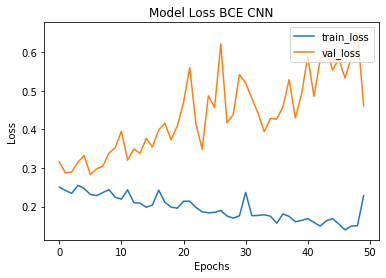

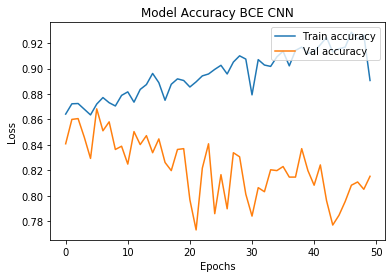

In [145]:
hist=model.fit(x_train, y_train, batch_size=64, epochs=50, verbose=0, class_weight=class_weights, validation_data=(x_val,y_val))
plt.plot(hist.history['loss'],label="train_loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.title("Model Loss BCE CNN") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist.history['acc'],label="Train accuracy" )
plt.plot(hist.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy BCE CNN") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

                Precision raw  Recall raw    F1 raw  F1 weighted  F1 macro  \
False Positive       0.869607    0.855660  0.862577     0.816117  0.790588   
Confirmed            0.706897    0.730693  0.718598     0.816117  0.790588   

                F1 micro  
False Positive  0.815335  
Confirmed       0.815335  


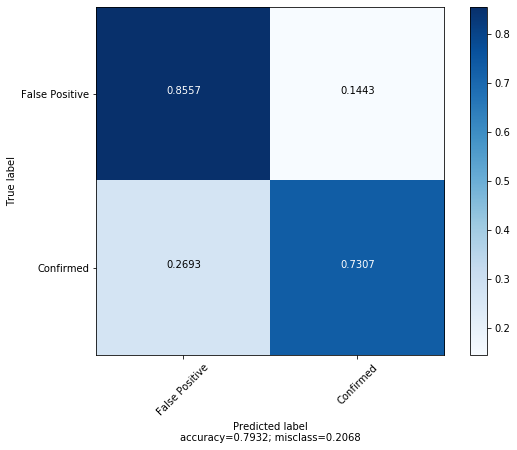

{'Precision raw': array([0.8696069 , 0.70689655]), 'Recall raw': array([0.85566038, 0.73069307]), 'F1 raw': array([0.86257727, 0.71859786]), 'F1 weighted': 0.816117460069127, 'F1 macro': 0.7905875642021112, 'F1 micro': 0.8153354632587859, 'Confusion Matrix': array([[907, 153],
       [136, 369]])}


In [146]:
predichos=model.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 50 epochs CNN'))

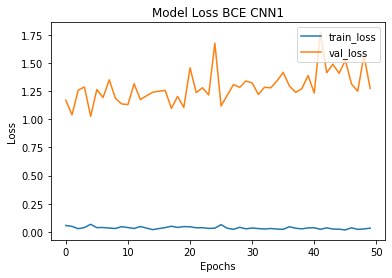

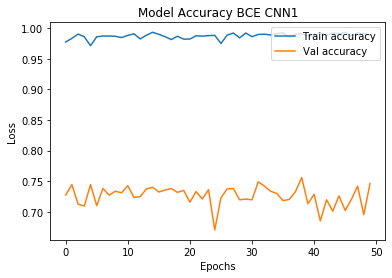

In [147]:
hist1=model1.fit(x_train, y_train, batch_size=64, epochs=50, verbose=0, class_weight=class_weights, validation_data=(x_val,y_val))
plt.plot(hist1.history['loss'],label="train_loss")
plt.plot(hist1.history['val_loss'],label="val_loss")
plt.title("Model Loss BCE CNN1") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist1.history['acc'],label="Train accuracy" )
plt.plot(hist1.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy BCE CNN1") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

                Precision raw  Recall raw    F1 raw  F1 weighted  F1 macro  \
False Positive       0.811268    0.815094  0.813176     0.745993  0.709076   
Confirmed            0.608000    0.601980  0.604975     0.745993  0.709076   

                F1 micro  
False Positive  0.746326  
Confirmed       0.746326  


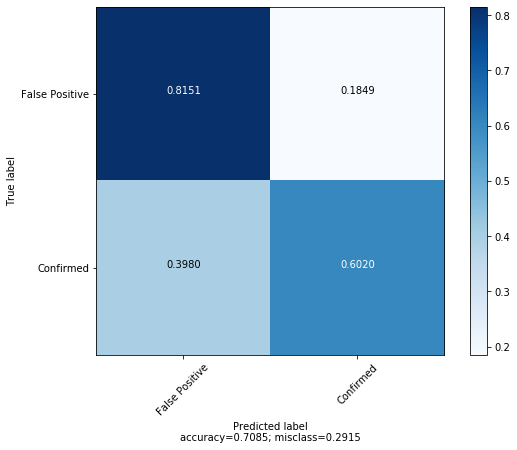

{'Precision raw': array([0.81126761, 0.608     ]), 'Recall raw': array([0.81509434, 0.6019802 ]), 'F1 raw': array([0.81317647, 0.60497512]), 'F1 weighted': 0.7459932885843289, 'F1 macro': 0.7090757974831724, 'F1 micro': 0.7463258785942491, 'Confusion Matrix': array([[864, 196],
       [201, 304]])}


In [148]:
predichos=model1.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 50 epochs CNN 1'))

In [17]:
def focal_loss(gamma=2., weights=1):   #weights np.asarray()
    weights= K.variable(weights)
    def focal_loss_fixed(y_true, y_pred):
        y_true = K.clip(y_true, K.epsilon(),1)
        y_pred = K.clip(y_pred,K.epsilon(),1)
        return - K.sum(weights* K.pow(1. - y_pred, gamma)* y_true * K.log(y_pred), axis=-1) 
    return focal_loss_fixed

In [18]:
model2 = Sequential()
model2.add(Conv2D(64, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.1))
model2.add(Conv2D(128, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model2.add(Conv2D(256, (3, 3), strides=(1, 1), activation="relu", padding="same"))
#model1.add(Flatten())
model2.add(GlobalAveragePooling2D())
model2.add(Dense(256,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(2, activation='softmax'))
model2.summary()

model2.compile(loss=focal_loss(2,weights=class_weights),optimizer='adam',metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 15, 15, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
global_average_pooling2d_3 ( (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
__________

In [19]:
y_train_cat=to_categorical(y_train, 2)
y_train_cat[:3]
y_val_cat=to_categorical(y_val, 2)
y_val_cat[:3]

array([[0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

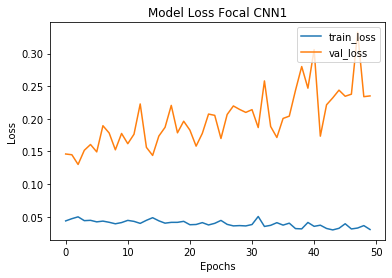

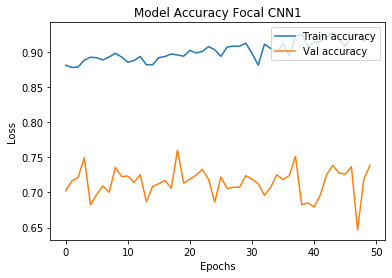

In [149]:
hist2=model2.fit(x_train, y_train_cat, batch_size=64, epochs=50, verbose=0, class_weight=class_weights, validation_data=(x_val,y_val_cat))
plt.plot(hist2.history['loss'],label="train_loss")
plt.plot(hist2.history['val_loss'],label="val_loss")
plt.title("Model Loss Focal CNN1") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist2.history['acc'],label="Train accuracy" )
plt.plot(hist2.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy Focal CNN1") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

                Precision raw  Recall raw    F1 raw  F1 weighted  F1 macro  \
False Positive       0.851892    0.743396  0.793955     0.745178  0.718375   
Confirmed            0.575000    0.728713  0.642795     0.745178  0.718375   

                F1 micro  
False Positive  0.738658  
Confirmed       0.738658  


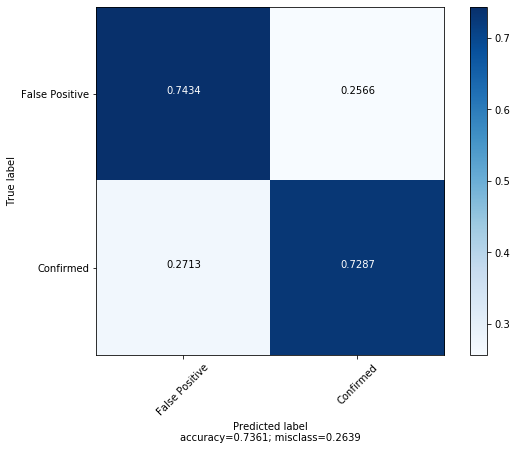

{'Precision raw': array([0.85189189, 0.575     ]), 'Recall raw': array([0.74339623, 0.72871287]), 'F1 raw': array([0.79395466, 0.64279476]), 'F1 weighted': 0.7451778231683003, 'F1 macro': 0.7183747098874749, 'F1 micro': 0.7386581469648562, 'Confusion Matrix': array([[788, 272],
       [137, 368]])}


In [150]:
predichos=model2.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 50 epochs CNN 1 Focal'))

# Segundo Modelo

In [25]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model3.add(Dropout(0.2))
model3.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model3.add(Dropout(0.1))
model3.add(GlobalAveragePooling2D())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

model3.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 15, 15, 32)        320       
_________________________________________________________________
dropout_16 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 32)        9248      
_________________________________________________________________
dropout_17 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
global_average_pooling2d_7 ( (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
__________

In [26]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model4.add(Dropout(0.2))
model4.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model4.add(Dropout(0.1))
model4.add(GlobalAveragePooling2D())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(2, activation='softmax'))
model4.summary()
model4.compile(loss=focal_loss(2,weights=class_weights),optimizer='adam',metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 15, 15, 32)        320       
_________________________________________________________________
dropout_19 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 32)        9248      
_________________________________________________________________
dropout_20 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
global_average_pooling2d_8 ( (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
__________

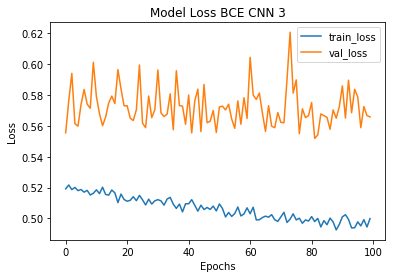

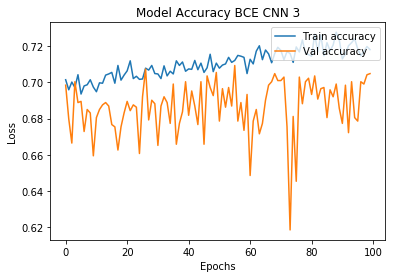

                F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.656462  0.704792  0.785316     0.702158       0.773810   
Confirmed       0.656462  0.704792  0.527607     0.702158       0.545455   

                Recall raw  
False Positive    0.797170  
Confirmed         0.510891  


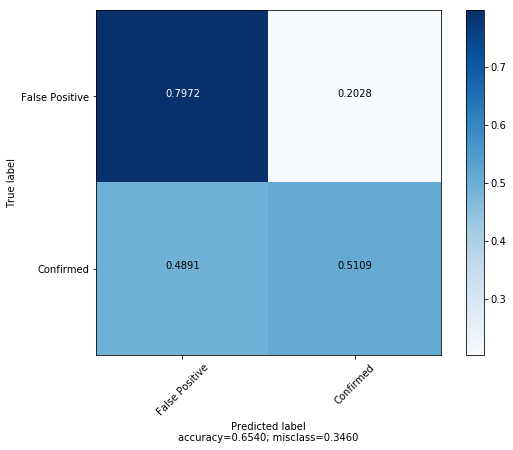

{'F1 macro': 0.6564616735466509, 'Recall raw': array([0.79716981, 0.51089109]), 'Confusion Matrix': array([[845, 215],
       [247, 258]]), 'Precision raw': array([0.77380952, 0.54545455]), 'F1 weighted': 0.7021576115203382, 'F1 micro': 0.7047923322683706, 'F1 raw': array([0.78531599, 0.52760736])}


In [29]:
hist3=model3.fit(x_train, y_train, batch_size=64, epochs=100, verbose=0, class_weight=class_weights, validation_data=(x_val,y_val))
plt.plot(hist3.history['loss'],label="train_loss")
plt.plot(hist3.history['val_loss'],label="val_loss")
plt.title("Model Loss BCE CNN 3") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist3.history['acc'],label="Train accuracy" )
plt.plot(hist3.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy BCE CNN 3") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

predichos=model3.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 50 epochs CNN 3 BCE'))

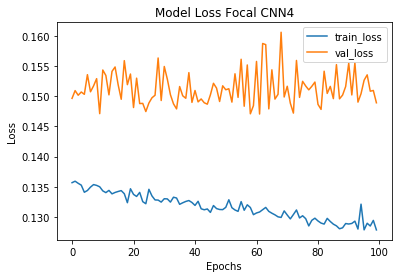

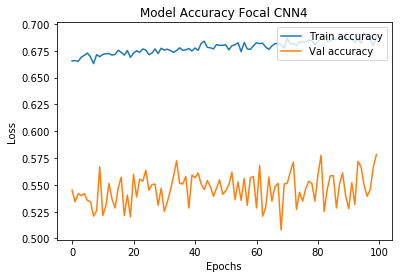

                F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.575654  0.578275  0.609005     0.587481       0.818471   
Confirmed       0.575654  0.578275  0.542302     0.587481       0.417289   

                Recall raw  
False Positive    0.484906  
Confirmed         0.774257  


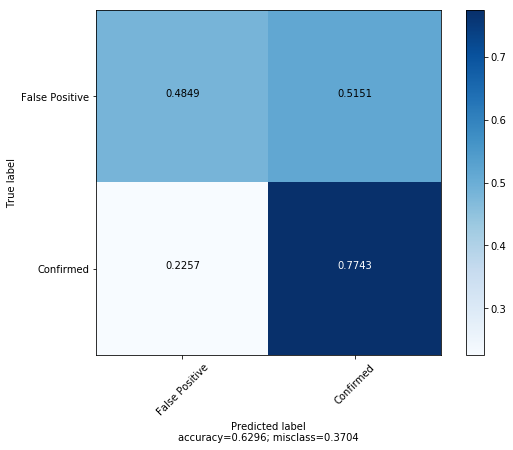

{'F1 macro': 0.5756535485864157, 'Recall raw': array([0.48490566, 0.77425743]), 'Confusion Matrix': array([[514, 546],
       [114, 391]]), 'Precision raw': array([0.81847134, 0.41728922]), 'F1 weighted': 0.5874809676703089, 'F1 micro': 0.5782747603833865, 'F1 raw': array([0.60900474, 0.54230236])}


In [30]:
hist4=model4.fit(x_train, y_train_cat, batch_size=64, epochs=100, verbose=0, class_weight=class_weights, validation_data=(x_val,y_val_cat))
plt.plot(hist4.history['loss'],label="train_loss")
plt.plot(hist4.history['val_loss'],label="val_loss")
plt.title("Model Loss Focal CNN4") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist4.history['acc'],label="Train accuracy" )
plt.plot(hist4.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy Focal CNN4") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

predichos=model4.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 50 epochs CNN 1 Focal'))

In [38]:
model5 = Sequential()
model5.add(Conv2D(16, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model5.add(Conv2D(16, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model5.add(MaxPooling2D((2,2)))
model5.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model5.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model5.add(GlobalAveragePooling2D())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(2, activation='softmax'))
model5.summary()
model5.compile(loss=focal_loss(2,weights=class_weights),optimizer='adam',metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 15, 15, 16)        160       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
global_average_pooling2d_11  (None, 32)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               4224      
__________

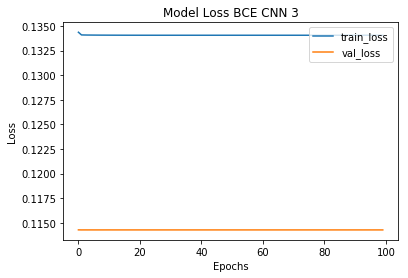

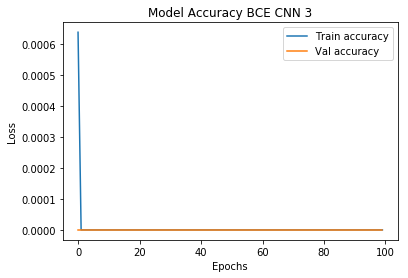

                F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.243961  0.322684  0.000000     0.157445       0.000000   
Confirmed       0.243961  0.322684  0.487923     0.157445       0.322684   

                Recall raw  
False Positive         0.0  
Confirmed              1.0  


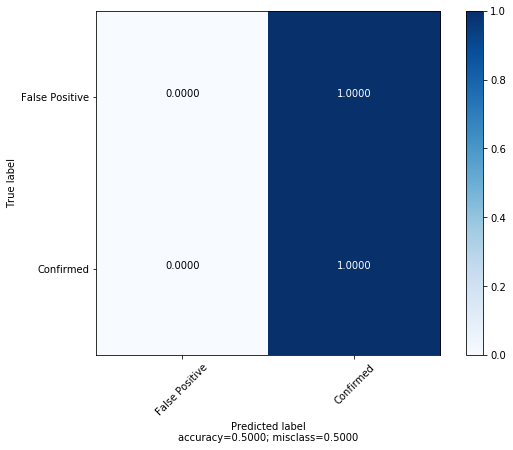

{'F1 macro': 0.2439613526570048, 'Recall raw': array([0., 1.]), 'Confusion Matrix': array([[   0, 1060],
       [   0,  505]]), 'Precision raw': array([0.        , 0.32268371]), 'F1 weighted': 0.15744470682656542, 'F1 micro': 0.3226837060702875, 'F1 raw': array([0.        , 0.48792271])}


In [39]:
hist5=model5.fit(x_train, y_train, batch_size=64, epochs=100, verbose=0, class_weight=class_weights, validation_data=(x_val,y_val))
plt.plot(hist5.history['loss'],label="train_loss")
plt.plot(hist5.history['val_loss'],label="val_loss")
plt.title("Model Loss BCE CNN 3") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()
plt.plot(hist5.history['acc'],label="Train accuracy" )
plt.plot(hist5.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy BCE CNN 3") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()
predichos=model5.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 100 epochs CNN 5 BCE'))

In [43]:
model6 = Sequential()
model6.add(Conv2D(16, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model6.add(BatchNormalization())
model6.add(Conv2D(16, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2,2)))

model6.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model6.add(BatchNormalization())

model6.add(GlobalAveragePooling2D())
model6.add(Dense(128, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.2))
model6.add(Dense(2, activation='softmax'))
model6.summary()
model6.compile(loss=focal_loss(2,weights=class_weights),optimizer='adam',metrics=['acc'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 15, 15, 16)        160       
_________________________________________________________________
batch_normalization_6 (Batch (None, 15, 15, 16)        64        
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 15, 15, 16)        2320      
_________________________________________________________________
batch_normalization_7 (Batch (None, 15, 15, 16)        64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
batch_normalization_8 (Batch (None, 7, 7, 32)          128       
__________

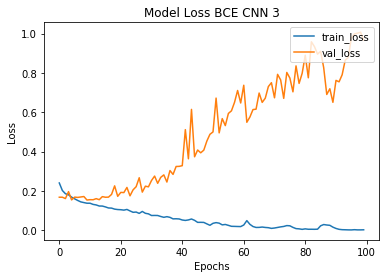

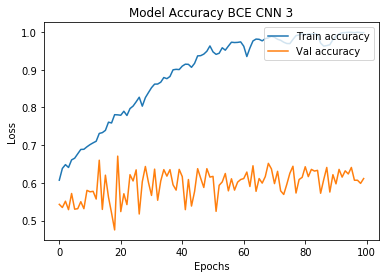

                F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.585637  0.611502  0.689162      0.62235       0.752232   
Confirmed       0.585637  0.611502  0.482112      0.62235       0.423019   

                Recall raw  
False Positive    0.635849  
Confirmed         0.560396  


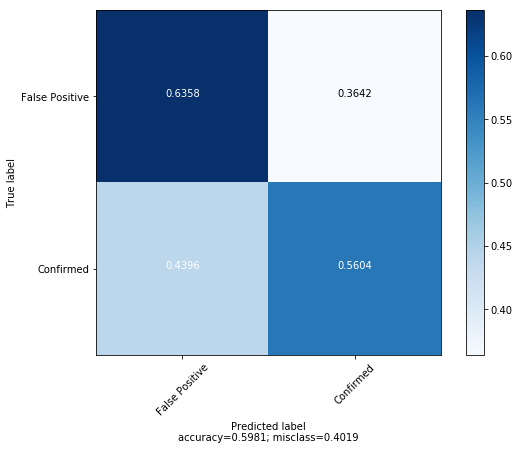

{'F1 macro': 0.5856369951540362, 'Recall raw': array([0.63584906, 0.56039604]), 'Confusion Matrix': array([[674, 386],
       [222, 283]]), 'Precision raw': array([0.75223214, 0.42301943]), 'F1 weighted': 0.6223501774327563, 'F1 micro': 0.6115015974440895, 'F1 raw': array([0.68916155, 0.48211244])}


In [44]:
hist6=model6.fit(x_train, y_train_cat, batch_size=128, epochs=100, verbose=0, class_weight=class_weights, validation_data=(x_val,y_val_cat))
plt.plot(hist6.history['loss'],label="train_loss")
plt.plot(hist6.history['val_loss'],label="val_loss")
plt.title("Model Loss Focal CNN 6") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist6.history['acc'],label="Train accuracy" )
plt.plot(hist6.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy Focal CNN 6") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

predichos=model6.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 100 epochs CNN 6 Focal'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 15, 15, 16)        160       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 15, 15, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 32)          0         
__________

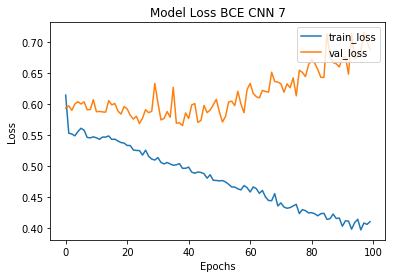

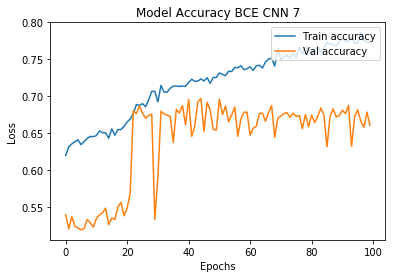

                F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.630743  0.660064  0.734796     0.667643       0.779070   
Confirmed       0.630743  0.660064  0.526690     0.667643       0.478191   

                Recall raw  
False Positive    0.695283  
Confirmed         0.586139  


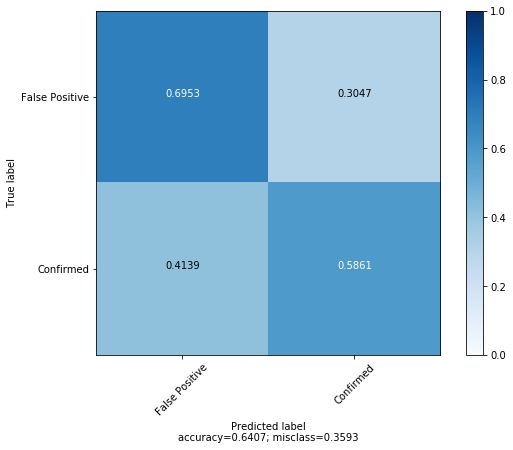

{'F1 macro': 0.6307430023097966, 'Recall raw': array([0.69528302, 0.58613861]), 'Confusion Matrix': array([[737, 323],
       [209, 296]]), 'Precision raw': array([0.77906977, 0.47819063]), 'F1 weighted': 0.6676434489693178, 'F1 micro': 0.6600638977635783, 'F1 raw': array([0.73479561, 0.52669039])}


In [25]:
model7 = Sequential()
model7.add(Conv2D(16, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model7.add(Conv2D(16, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model7.add(MaxPooling2D((2,2)))
model7.add(Dropout(0.25))

#model7.add(Dropout(0.15))
model7.add(Conv2D(32, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model7.add(Conv2D(32, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model7.add(MaxPooling2D((2,2)))
model7.add(Dropout(0.25))

model7.add(Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model7.add(Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same"))
#model7.add(MaxPooling2D((2,2)))
model7.add(Dropout(0.25))

model7.add(GlobalAveragePooling2D())
#model7.add(Dropout(0.15))
model7.add(Dense(1, activation='sigmoid'))
model7.summary()

model7.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

hist7=model7.fit(x_train, y_train, batch_size=128, epochs=100, verbose=0, class_weight=class_weights, validation_data=(x_val,y_val))
plt.plot(hist7.history['loss'],label="train_loss")
plt.plot(hist7.history['val_loss'],label="val_loss")
plt.title("Model Loss BCE CNN 7") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist7.history['acc'],label="Train accuracy" )
plt.plot(hist7.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy BCE CNN 7") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

predichos=model7.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 100 epochs CNN 7 BCE'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 15, 15, 32)        320       
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
global_average_pooling2d_5 ( (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
__________

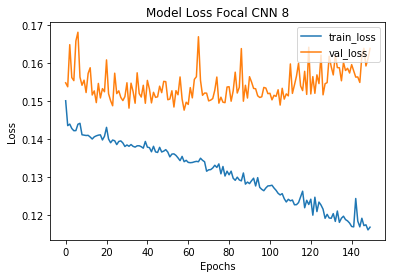

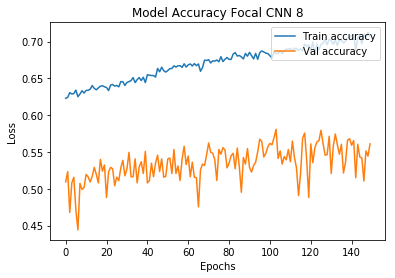

                F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.560537  0.561022  0.575139     0.565716       0.834829   
Confirmed       0.560537  0.561022  0.545935     0.565716       0.409722   

                Recall raw  
False Positive    0.438679  
Confirmed         0.817822  


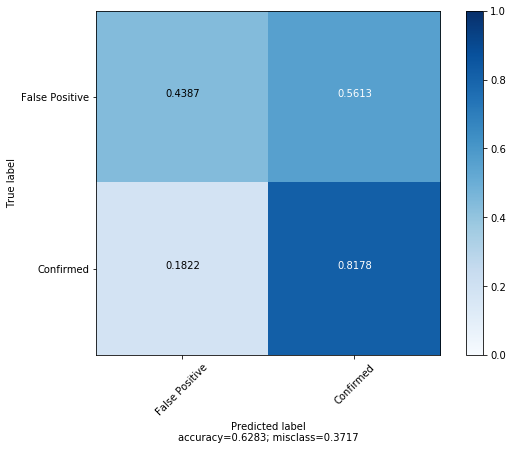

{'F1 macro': 0.5605371872957559, 'Recall raw': array([0.43867925, 0.81782178]), 'Confusion Matrix': array([[465, 595],
       [ 92, 413]]), 'Precision raw': array([0.83482944, 0.40972222]), 'F1 weighted': 0.5657155179001898, 'F1 micro': 0.5610223642172524, 'F1 raw': array([0.57513915, 0.54593523])}


In [21]:
model8 = Sequential()
model8.add(Conv2D(32, (3, 3), input_shape=(15,15,1), strides=(1, 1),activation="relu", padding="same"))
model8.add(Dropout(0.15))
model8.add(Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model8.add(Dropout(0.15))
model8.add(Conv2D(128, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model8.add(GlobalAveragePooling2D())
model8.add(Dense(256,activation='relu'))
model8.add(Dropout(0.3))
model8.add(Dense(128, activation='relu'))
model8.add(Dropout(0.15))
model8.add(Dense(2, activation='softmax'))
model8.summary()

model8.compile(loss=focal_loss(2,weights=class_weights),optimizer='adam',metrics=['acc'])

hist8=model8.fit(x_train, y_train_cat, batch_size=128, epochs=150, verbose=0, class_weight=class_weights, validation_data=(x_val,y_val_cat))
plt.plot(hist8.history['loss'],label="train_loss")
plt.plot(hist8.history['val_loss'],label="val_loss")
plt.title("Model Loss Focal CNN 8") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist8.history['acc'],label="Train accuracy" )
plt.plot(hist8.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy Focal CNN 8") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

predichos=model8.predict_classes(x_val)
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 150 epochs CNN 8 Focal'))

In [28]:
x_train.shape

(4692, 15, 15, 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 15, 32)            1472      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 7, 32)             0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 7, 64)             6208      
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 7, 64)             12352     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 3, 64)             0         
__________

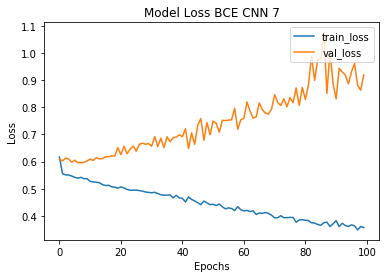

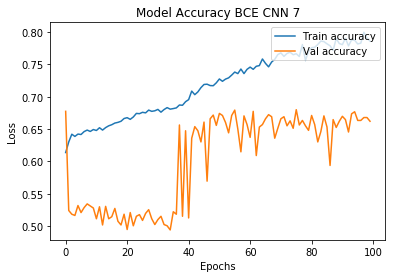

                F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.600958  0.661981  0.757005     0.656297       0.737690   
Confirmed       0.600958  0.661981  0.444911     0.656297       0.473214   

                Recall raw  
False Positive    0.777358  
Confirmed         0.419802  


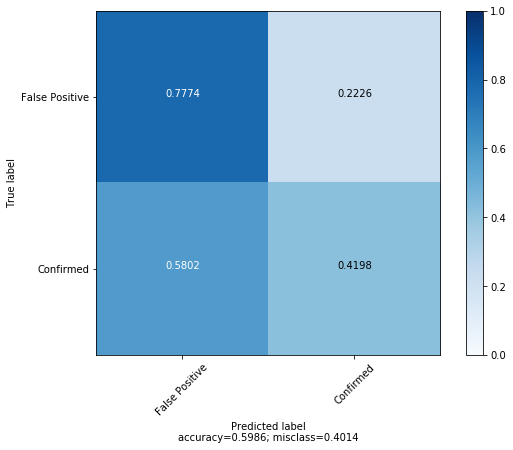

{'F1 macro': 0.6009579303999024, 'Recall raw': array([0.77735849, 0.41980198]), 'Confusion Matrix': array([[824, 236],
       [293, 212]]), 'Precision raw': array([0.73769024, 0.47321429]), 'F1 weighted': 0.6562973252535271, 'F1 micro': 0.6619808306709265, 'F1 raw': array([0.75700505, 0.44491081])}


In [33]:
model9 = Sequential()
model9.add(Conv1D(32, 3, input_shape=(15,15), strides=1,activation="relu", padding="same"))
model9.add(Conv1D(32, 3, strides=1, activation="relu", padding="same"))
model9.add(MaxPooling1D(2))
model9.add(Dropout(0.25))

#model7.add(Dropout(0.15))
model9.add(Conv1D(64, 3, strides=1, activation="relu", padding="same"))
model9.add(Conv1D(64, 3, strides=1, activation="relu", padding="same"))
model9.add(MaxPooling1D(2))
model9.add(Dropout(0.25))

model9.add(Conv1D(128, 3, strides=1, activation="relu", padding="same"))
model9.add(Conv1D(128, 3, strides=1, activation="relu", padding="same"))
#model7.add(MaxPooling2D((2,2)))
model9.add(Dropout(0.25))

model9.add(GlobalAveragePooling1D())
model9.add(Dense(128,activation='relu'))
model9.add(Dropout(0.5))
model9.add(Dense(1, activation='sigmoid'))
model9.summary()

model9.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

hist9=model9.fit(np.squeeze(x_train), y_train, batch_size=128, epochs=100, verbose=0, class_weight=class_weights, validation_data=(np.squeeze(x_val),y_val))
plt.plot(hist9.history['loss'],label="train_loss")
plt.plot(hist9.history['val_loss'],label="val_loss")
plt.title("Model Loss BCE CNN 7") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

plt.plot(hist9.history['acc'],label="Train accuracy" )
plt.plot(hist9.history['val_acc'],label="Val accuracy" )
plt.title("Model Accuracy BCE CNN 7") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

predichos=model9.predict_classes(np.squeeze(x_val))
print (calculate_metrics(y_val,predichos,'[VAL] Confusion Matrix 100 epochs CNN 9 BCE'))